<a href="https://colab.research.google.com/github/rhudaina/Linear-Systems-and-Applications-A-Hands-On-Python-Workshop/blob/main/Day2/Day_2_Hands_on_Activity_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Consider $n\times n$ random matrix. Compare runtimes for solving $$Ax = y$$ using LU, QR, `eig`, SVD, `np.linalg.inv`, `np.linalg.solve`, `np.linalg.pinv`. Which is the fastest?

In [3]:
import numpy as np
n = 100
A = np.random.randn(n,n)
x = np.random.randn(n)

y = A @ x

# Solve: Ax = y

### 2. Consider approximating the solution to the boundary value problem
$$\begin{cases} -u'' = \frac{\pi}{2}\sin\big(\frac{\pi}{2}x\big)\qquad 0\leq x\leq 1\\u(0) = 0\\ u(1) = 0\end{cases}$$
via finite difference method. Solve the resulting linear system $Au = y$ using LU, QR, `eig`, SVD, `np.linalg.inv`, `np.linalg.solve`, `np.linalg.pinv`. Which is the fastest when matrix $A$ is $1000\times 1000$?

In [12]:
n = 1000
x = np.linspace(0,1,n+2)
h = 1/(n+1)

A = np.zeros((n,n))
for i in range(n):
  A[i,i] = 2

for i in range(n-1):
  A[i+1,i] = -1
  A[i,i+1] = -1
A = A/(h*h)

In [15]:
f = lambda x: 0.5 * np.pi * np.sin(np.pi/2)
y = np.zeros(n)
for i in range(n):
  y[i] = f(x[i+1])

0.05435991287231445


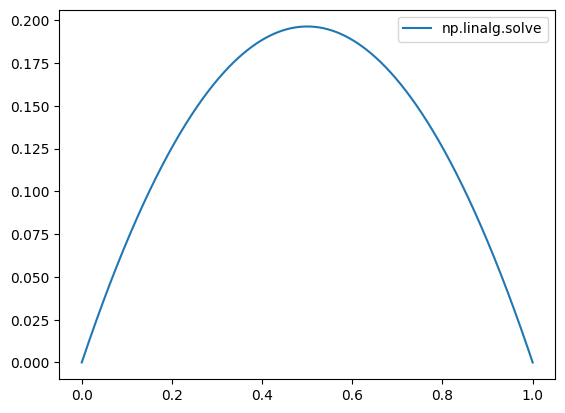

In [21]:
import matplotlib.pyplot as plt
import time

t0 = time.time()
u = np.linalg.solve(A, y)
print(time.time() - t0)

w = np.zeros(n+2)
w[1:n+1] = u

plt.plot(x,w, label = 'np.linalg.solve')
plt.legend()
plt.show()

Source: [Brad Nelson (2021), Scientific Computing with Python](https://caam37830.github.io/book/index.html)